# Data Analysis

#### Importing necessary libraries/modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
true=pd.read_csv("True.csv")
fake=pd.read_csv("Fake.csv")

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true["category"]=0
fake["category"]=1

In [6]:
data=pd.concat([true,fake]).reset_index(drop=True)

In [7]:
data.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [8]:
data.tail()

,title,text,subject,date,category
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


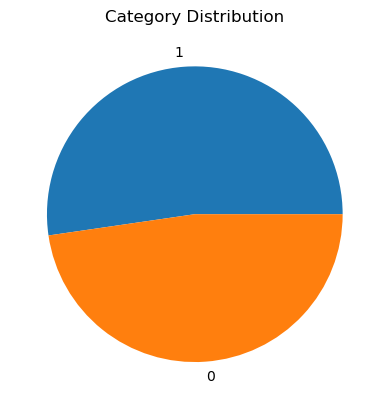

In [9]:
plt.pie(data['category'].value_counts().values,labels=data['category'].value_counts().index)
plt.title('Category Distribution')
plt.show()

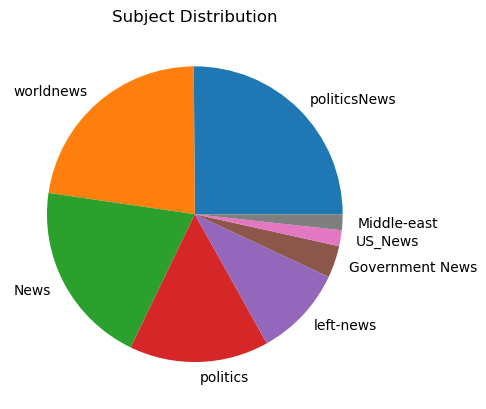

In [10]:
plt.pie(data['subject'].value_counts().values,labels=data['subject'].value_counts().index)
plt.title('Subject Distribution')
plt.show()

#### For now, we'll consider only two columns - text and category

# Reassigning our dataset by omitting "not so useful" columns

In [11]:
data_matters=data[["text","category"]]

In [12]:
data_matters.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [13]:
data_matters=data_matters.sample(frac=1) #shuffling

In [14]:
data_matters.head()

,text,category
42224,B..b b but what about the wave the baseball ga...,1
12975,LONDON (Reuters) - No fuel shipments have reac...,0
21862,If Donald Trump drags us into war with North K...,1
37975,Oh no! Florida killed a counter-terrorism bill...,1
31638,Esteemed Democratic Attorney Alan Dershowitz U...,1


In [15]:
data_matters.reset_index(inplace=True)

In [16]:
data_matters.head()

,index,text,category
0,42224,B..b b but what about the wave the baseball ga...,1
1,12975,LONDON (Reuters) - No fuel shipments have reac...,0
2,21862,If Donald Trump drags us into war with North K...,1
3,37975,Oh no! Florida killed a counter-terrorism bill...,1
4,31638,Esteemed Democratic Attorney Alan Dershowitz U...,1


In [17]:
data_matters.drop(["index"],axis=1,inplace=True)

In [18]:
data_matters.head()

,text,category
0,B..b b but what about the wave the baseball ga...,1
1,LONDON (Reuters) - No fuel shipments have reac...,0
2,If Donald Trump drags us into war with North K...,1
3,Oh no! Florida killed a counter-terrorism bill...,1
4,Esteemed Democratic Attorney Alan Dershowitz U...,1


# Noisy Entity Removal
#### Checking for NaN and empty strings(whitespaces)

In [19]:
data_matters.isna().sum() #checking for null values

text        0
category    0
dtype: int64

In [20]:
blanks=[]
for i,text in data_matters["text"].items(): 
    if text.isspace(): #checking for ␢
        blanks.append(i)
len(blanks)

631

In [21]:
blanks

[49,
 79,
 120,
 156,
 225,
 405,
 450,
 517,
 608,
 742,
 978,
 989,
 1014,
 1030,
 1086,
 1128,
 1143,
 1173,
 1176,
 1182,
 1254,
 1319,
 1480,
 1567,
 1682,
 1704,
 1752,
 1770,
 1780,
 2065,
 2073,
 2078,
 2194,
 2254,
 2263,
 2318,
 2324,
 2358,
 2401,
 2517,
 2542,
 2607,
 2637,
 2681,
 2724,
 2738,
 2754,
 2832,
 2931,
 3201,
 3206,
 3210,
 3376,
 3423,
 3445,
 3505,
 3530,
 3545,
 3600,
 3613,
 3707,
 3732,
 3795,
 3911,
 4034,
 4048,
 4085,
 4102,
 4134,
 4298,
 4299,
 4332,
 4367,
 4461,
 4549,
 4678,
 4717,
 4725,
 4731,
 4764,
 4793,
 4936,
 5008,
 5132,
 5140,
 5180,
 5270,
 5311,
 5443,
 5977,
 6003,
 6092,
 6154,
 6402,
 6495,
 6529,
 6536,
 6581,
 6669,
 6779,
 6789,
 6905,
 7077,
 7280,
 7289,
 7317,
 7323,
 7325,
 7435,
 7450,
 7477,
 7478,
 7588,
 7775,
 7780,
 7952,
 7970,
 8073,
 8195,
 8246,
 8385,
 8841,
 8905,
 8974,
 9124,
 9154,
 9200,
 9202,
 9499,
 9557,
 9592,
 9602,
 9666,
 9686,
 9690,
 9760,
 9779,
 9838,
 9860,
 9911,
 9982,
 10108,
 10166,
 10194,
 10

In [22]:
data_matters["text"][123]

'LONDON (Reuters) - Two people were injured on Thursday, police said, after a report of an explosion near the Scottish town of Glasgow. The blast was reported inside a building in Wishaw, southeast of Glasgow, and police said they had evacuated nearby buildings as a precaution.  Emergency services are at the scene and two injured parties are being treated by ambulance,  Lanarkshire Police said on Facebook.  Scotland s Fire and Rescue Service said it too was at the scene.  We are in attendance at Bonkle Road, Wishaw tackling small fire following small explosion in commercial building,  it posted on its Twitter feed.  '

In [23]:
data_matters["text"][18970]

'VIENNA (Reuters) - Austrians elect a new parliament on Sunday in a test of whether a young conservative star has succeeded in halting the resurgence of the far-right Freedom Party after a campaign in which immigration has been the dominant issue.  Many voters feel the country was overrun in Europe s migration crisis in 2015, when it took in about 1 percent of its population in asylum seekers.  By taking a hard line that has left little daylight between him and the Freedom Party (FPO), Foreign Minister Sebastian Kurz, 31 has dislodged it from first place in opinion polls and he is the favorite to become Austria s next leader. Polls show the FPO in a close race for second place with the Social Democrats, who Kurz and his party have been at loggerheads with in the current coalition government.  That gives the FPO, which currently has a fifth of seats in parliament and is in government in two of Austria s nine provinces, a good chance of entering a national coalition.   It s still not cer

In [24]:
data_matters.shape

(44898, 2)

In [25]:
data_matters=data_matters.drop(blanks) #dropping the ␢s coz we don't care

In [26]:
data_matters.shape #44267+631=44898 ..hmm

(44267, 2)

## Data Cleaning ..continued
#### More imports 

In [27]:
import nltk, spacy, re 
spcy=spacy.load("en_core_web_sm")

#### Removing stopwords(like,.. a, an, the,..)
##### nltk.corpus has a list of stopwords - we'll utilize it for removing the stopwords
##### nltk.stem has WordNetLemmatizer - we'll use it for lemmatization

In [28]:
lemmatizer=nltk.stem.WordNetLemmatizer()

In [29]:
swords1 =spcy.Defaults.stop_words
print(len(swords1))
swords2 =nltk.corpus.stopwords.words('english')
print(len(swords2))

Stopwords=set(swords1).union(set(swords2)) #set(swords1)|set(swords2)
print(len(Stopwords))

326
179
382


In [30]:
# Data Cleaning Function
def clean_it(text):
    string=""
    text=text.lower() #lower-case - for simplification purpose
    
    # Pattern matching - removing redundancy
    # removing URLs
    text=re.sub(r"https?://\S+|www\.\S+","",text)
    # removings tags
    text=re.sub(r"<.*?>","",text)
    # removing the twins
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"she's","she is",text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", "will", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r"\'d", "would", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"shouldn't", "should not", text)
    # removing special characters, extra whitespaces
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:;]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ',text) #if ^(not)( A-Z or a-z or 0-9 ) replace with " "
    # remove stopwords + lemmatize
    for words in text.split():
        if words not in Stopwords:
            string+=lemmatizer.lemmatize(words)+" "
    return string

In [31]:
data_matters["text"]=data_matters["text"].apply(clean_it)

In [32]:
data_matters["text"]

0        b b b wave baseball game posing che guevara ar...
1        london reuters fuel shipment reached yemen lar...
2        donald trump drag war north korea help importa...
3        oh florida killed counter terrorism bill right...
4        esteemed democratic attorney alan dershowitz u...
                               ...                        
44893    xiamen china reuters china 80 million funding ...
44894    ankara reuters turkish russian official meet f...
44895    bikers trump leader chris cox spoke fox stuart...
44896    washington reuters budget plan crucial preside...
44897    washington reuters central intelligence agency...
Name: text, Length: 44267, dtype: object

# Feature Extraction

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
x=data_matters["text"] #feature vector
y=data_matters["category"] #labels

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [36]:
vectorizer =TfidfVectorizer()

In [37]:
x_trainvector=vectorizer.fit_transform(x_train)
x_testvector=vectorizer.transform(x_test)

In [38]:
x_trainvector # 94163

<30986x94247 sparse matrix of type '<class 'numpy.float64'>'
	with 4594102 stored elements in Compressed Sparse Row format>

In [39]:
x_testvector # 94163 check

<13281x94247 sparse matrix of type '<class 'numpy.float64'>'
	with 1968260 stored elements in Compressed Sparse Row format>

# Model Selection and Training

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier()

In [42]:
model.fit(x_trainvector,y_train)

DecisionTreeClassifier()

# Model Evaluation

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
prediction=model.predict(x_testvector)

In [45]:
print(accuracy_score(y_test,prediction))

0.9962352232512612


In [46]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6380
           1       0.99      1.00      1.00      6901

    accuracy                           1.00     13281
   macro avg       1.00      1.00      1.00     13281
weighted avg       1.00      1.00      1.00     13281



In [47]:
print(confusion_matrix(prediction,y_test))

[[6343   13]
 [  37 6888]]


# Testing

In [48]:
def testing(news):
    toBeTested={"text":[news]} #formatting
    newToBeTested=pd.DataFrame(toBeTested)
    newToBeTested["text"]=newToBeTested["text"].apply(clean_it) #cleaning and lemmatizing
    x_test_instance=newToBeTested["text"] #extracting the text column for prediction
    x_test_instance_vector=vectorizer.transform(x_test_instance) #tfidf
    prediction=model.predict(x_test_instance_vector)
    if prediction == 0:
        return "Reliable"
    return "Unreliable"

In [ ]:
newsAtTest=str(input()) #fake news-- Source - https://www.theonion.com/trump-watching-movie-on-ipad-during-trial-without-using-1851449290

In [ ]:
testing(newsAtTest)